## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#Import initial pacages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
#Load in csv created from basketballreference.com open source data
#All stats are per 36 minutes played


df = pd.read_csv('nba_mod_4.csv')

In [3]:
#Preview the data
df.head()

,Year,Player,concat,count,Pos,Age,Tm,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Honors
0,2019,Álex Abrines,2019Álex Abrines,1,SG,25,OKC,31,2,588,...,0.3,2.6,2.9,1.2,1.0,0.4,0.9,3.2,10.1,No_Honors
1,2019,Quincy Acy,2019Quincy Acy,1,PF,28,PHO,10,0,123,...,0.9,6.4,7.3,2.3,0.3,1.2,1.2,7.0,5.0,No_Honors
2,2019,Jaylen Adams,2019Jaylen Adams,1,PG,22,ATL,34,1,428,...,0.9,4.1,5.0,5.5,1.2,0.4,2.4,3.8,9.1,No_Honors
3,2019,Steven Adams,2019Steven Adams,1,C,25,OKC,80,80,2669,...,5.3,5.0,10.3,1.7,1.6,1.0,1.8,2.8,14.9,No_Honors
4,2019,Bam Adebayo,2019Bam Adebayo,1,C,21,MIA,82,28,1913,...,3.1,8.1,11.2,3.5,1.3,1.2,2.3,3.8,13.7,No_Honors


In [4]:
#Remove duplicate entries for players who moved mid-season
indeces_to_remove = list(df[(df['count'] > 1) & (df['Tm'] != 'TOT')].index)
df = df.reset_index(drop = True)

In [5]:
#Remove columns used to find repeat entries
df = df.drop(['concat', 'count'], axis = 1)

In [6]:
#Create a DataFrame without player names, games, played, and team
df_anon = df.drop(['Player', 'G', 'GS', 'Tm'], axis = 1)

In [7]:
#Check for null values

df_anon.isna().sum()

Year         0
Pos          0
Age          0
MP           0
FG           5
FGA          5
FG%         63
3P           5
3PA          5
3P%       1864
2P           5
2PA          5
2P%        107
FT           5
FTA          5
FT%        541
ORB          5
DRB          5
TRB          5
AST          5
STL          5
BLK          5
TOV          5
PF           5
PTS          5
Honors       0
dtype: int64

In [8]:
#replace nulls with 0
#Can't use median because it assumes causes errors when using Standard Scaler 

for col in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
           'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    df_anon[col] = df_anon[col].fillna(0)

In [9]:
#Confirm that all nulls are removed


df_anon.isna().sum().sum()

0

In [10]:
#Create a df that has only stats and honors label
df_quant_only = df_anon.drop(['Year', 'Pos', 'Age'], axis = 1)

In [11]:
#Change data back from per36 to toatls in order to calculate another metric

for col in ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']:
    df_quant_only[col] = (df_quant_only[col] / 36) * df_quant_only['MP']

In [12]:
#replace nulls with 0
#Can't use median because it assumes causes errors when using Standard Scaler 

for col in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
           'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    df_quant_only[col] = df_quant_only[col].fillna(0)

In [13]:
#Utilize True Shooting Percentage metric

true_shooting_attempts = df_quant_only['FGA'] + (.44 * df_quant_only['FTA'])
true_shooting_percentage = df_quant_only['PTS'] /  (2*true_shooting_attempts)
df_quant_only['TSP'] = true_shooting_percentage

df_quant_only['TSP'] = df_quant_only['TSP'].fillna(df_quant_only['TSP'].median())

In [14]:
#Assist to turnover ratio measures risk-reducing playmaking ability, which is the ideal
#for a basketball player

df_quant_only['a/t_ratio'] = df_quant_only['AST'] / df_quant_only['TOV']
df_quant_only['a/t_ratio'] = df_quant_only['a/t_ratio'].fillna(0)

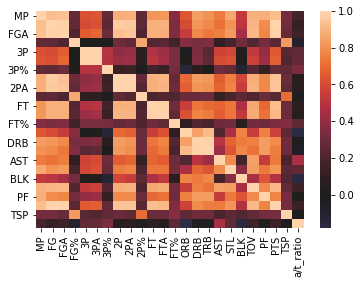

In [15]:
#I assume I will need to go back to per36 stats in order to avoid high multicolinearity
#I will graph to confirm


features_quant = df_quant_only.drop(['Honors'], axis = 1)

import seaborn as sns

#Check colinearity heat map
sns.heatmap(features_quant.corr(), center=0);

#Suspicion confirmed - need to change back

In [16]:
#Change data back from per36 to toatls in order to calculate another metric

for col in ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']:
    df_quant_only[col] = (df_quant_only[col] / df_quant_only['MP']) * 36

In [17]:
#Change data back from per36 to toatls in order to calculate another metric

for col in ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'TSP', 'a/t_ratio']:
    df_quant_only[col]  = df_quant_only[col].fillna(0)

In [18]:
#Some entries have assists but no turnovers leading to an infinite assist to turnover ratio
#I will replace those values with the 90th percentile value of a/t ratio

percentile_90 = int(len(sorted(df_quant_only['a/t_ratio'], reverse = True)) * .9)

ratio = df_quant_only['a/t_ratio']
for index in range(len(ratio)):
    if ratio[index] == math.inf:
        ratio[index] = sorted(df_quant_only['a/t_ratio'])[percentile_90]
df_quant_only['a/t_ratio'] = ratio

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


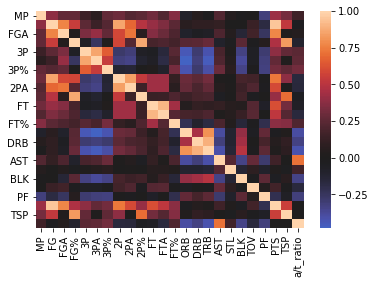

In [19]:
#Check multicollinearity matrix of the features

features_quant = df_quant_only.drop(['Honors'], axis = 1)

import seaborn as sns

#Check colinearity heat map
sns.heatmap(features_quant.corr(), center=0);

#Per36 stats solved the prior issue

# First: With minutes played and original counting stats

In [20]:
#create a new df
df_with_min = df_quant_only.copy()

In [21]:
#Separate target and features

features_with_min = df_with_min.drop(['Honors'], axis = 1)
target_with_min = df_with_min['Honors']

#Standardize feature values with Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_with_min = pd.DataFrame(scaler.fit_transform(features_with_min), columns = features_with_min.columns)

## Multicollinearity Check

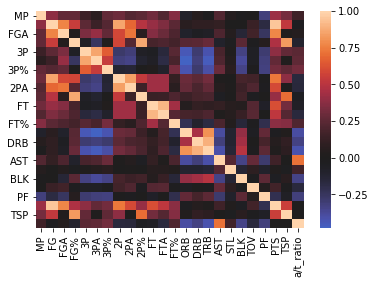

In [22]:
#Check colinearity heat map
sns.heatmap(scaled_features_with_min.corr(), center=0);

In [23]:
#Check for colinearity numerically using .75 as a cutoff

def collinearity_dict(dataframe, cutoff = .75):
    df = dataframe
    collinearity = {}

    for col_index in range(len(df.columns)):
        too_high = []
        for row_index in range(len(df.columns)):
            if col_index != row_index:
                if (abs(df.corr()) > cutoff).iloc[col_index][row_index] == True:
                     too_high.append([df.columns[row_index]])
        collinearity[df.columns[col_index]] = too_high
    
    return collinearity

In [24]:
#Check colinearity overlap issues
collinearity_dict(scaled_features_with_min)

{'MP': [],
 'FG': [['FGA'], ['2P'], ['PTS']],
 'FGA': [['FG'], ['PTS']],
 'FG%': [['2P%'], ['TSP']],
 '3P': [['3PA']],
 '3PA': [['3P']],
 '3P%': [],
 '2P': [['FG'], ['2PA']],
 '2PA': [['2P']],
 '2P%': [['FG%']],
 'FT': [['FTA']],
 'FTA': [['FT']],
 'FT%': [],
 'ORB': [['TRB']],
 'DRB': [['TRB']],
 'TRB': [['ORB'], ['DRB']],
 'AST': [],
 'STL': [],
 'BLK': [],
 'TOV': [],
 'PF': [],
 'PTS': [['FG'], ['FGA']],
 'TSP': [['FG%']],
 'a/t_ratio': []}

In [25]:
#Drop overlapping features + advanced statistics (to be used later)

scaled_features_with_min = scaled_features_with_min.drop(['FG', 'FGA', 'TRB',
                                                         'FTA', 'FG%', '2P',
                                                         '3P', 'TSP', 'a/t_ratio'],axis = 1)

In [26]:
#Double check multicolinearity

collinearity_dict(scaled_features_with_min)

{'MP': [],
 '3PA': [],
 '3P%': [],
 '2PA': [],
 '2P%': [],
 'FT': [],
 'FT%': [],
 'ORB': [],
 'DRB': [],
 'AST': [],
 'STL': [],
 'BLK': [],
 'TOV': [],
 'PF': [],
 'PTS': []}

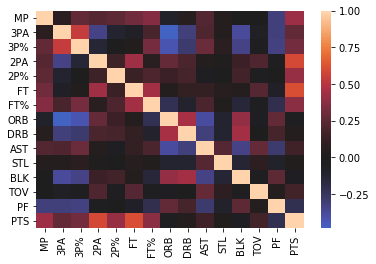

In [27]:
#Confirm with visualization

import seaborn as sns

#Check colinearity heat map
sns.heatmap(scaled_features_with_min.corr(), center=0);

In [28]:
#import package for train and test sets
from sklearn.model_selection import train_test_split

In [29]:
#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(scaled_features_with_min, target_with_min, test_size = .2, random_state = 123)

#Conduct Simple Classifications

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))
    


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine pipeline test accuracy: 0.9835212489158717
Decision Tree pipeline test accuracy: 0.9778837814397224
Random Forest pipeline test accuracy: 0.9830875975715525


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
#Grid search to find best parameters


#SVM

from sklearn.model_selection import GridSearchCV

#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state = 123))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)




#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 10, 'clf__gamma' = .01, and kernel = 'rbf'

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 1, kernel = 'linear', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.3s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.4s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.4s finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  1.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   18.0s finished


Best accuracy for SVM 0.9771248915871639
Best params for SVM {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9757155247181266
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 50}


In [31]:
#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 10, 'clf__gamma' = .01, and kernel = 'rbf'

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 10, gamma = .01, kernel = 'rbf', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)


Best accuracy for SVM 0.9771248915871639
Best params for SVM {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9757155247181266
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 50}


In [32]:
#Test model accuracy
print(accuracy_score(y_test, preds))

0.9839549002601908


# Second: Without minutes played, with original counting stats

In [33]:
#Create a quatnitative dataframe that does not include minutes played
df_no_min = df_quant_only.drop(['MP'], axis = 1)

In [34]:
#Remove nulls

for col in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
           'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    df_no_min[col] = df_no_min[col].fillna(0)

In [35]:
#Separate features and target
features_no_min = df_no_min.drop(['Honors'], axis = 1)
target_no_min = df_no_min['Honors']

#Standardize feature values with Standard Scaler
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_no_min = pd.DataFrame(scaler.fit_transform(features_no_min), columns = features_no_min.columns)

In [36]:
#Drop same multicolinearity columns

scaled_features_no_min = scaled_features_no_min.drop(['FG', 'FGA', 'TRB',
                                                      'FTA', 'FG%', '2P',
                                                      '3P', 'TSP', 'a/t_ratio'],axis = 1)


In [37]:
#Create train and test splits with new set of features
X_train, X_test, y_train, y_test = train_test_split(scaled_features_no_min, target_no_min, test_size = .2, random_state = 123)

#Conduct Simple Classifications

#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))









/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine pipeline test accuracy: 0.9822202948829142
Decision Tree pipeline test accuracy: 0.9696444058976583
Random Forest pipeline test accuracy: 0.9804856895056374


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#Grid search to find best parameters


#SVM

from sklearn.model_selection import GridSearchCV

#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state = 123))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)




#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 10, 'clf__gamma' = .01, and kernel = 'rbf'

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 1, kernel = 'linear', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.2s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.7s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.6s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.9s finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  1.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.4s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   17.5s finished


Best accuracy for SVM 0.9754986990459671
Best params for SVM {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9741977450130095
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [39]:
#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 10, 'clf__gamma' = .01, and kernel = 'rbf'

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 10,gamma = .01, kernel = 'rbf', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)





Best accuracy for SVM 0.9754986990459671
Best params for SVM {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9741977450130095
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [40]:
#Test model accuracy
print(accuracy_score(y_test, preds))

0.9822202948829142


## With edited stats

In [41]:
#The model is still far more accurate thatn I would have predicted 
#for it to be with minutes played excluded

#The reason is that attempts is another indicator of playing tim
#Next step: Try the model with a smaller selection of stats

#Having points, attempts, and percentages may have some overcounting

In [42]:
#Remove asssist and turnovers - I will be using assist to turnover ratio
df_no_min_edited = df_quant_only.drop(['AST', 'TOV', 'MP'], axis = 1)


In [43]:
#Fouls committed tend not to be a large indicator of player performance, at least not traditionally

df_no_min_edited.drop(['PF'], axis = 1, inplace = True)

In [44]:
#Remove shooting stats and replace with TSP 
df_no_min_edited.drop(['TRB', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%'], axis = 1, inplace = True)


In [45]:
#Separate target and features

features_edited = df_no_min_edited.drop(['Honors'], axis = 1)
target_edited= df_no_min_edited['Honors']

#Standardize feature values with Standard Scaler
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_edited = pd.DataFrame(scaler.fit_transform(features_edited), columns = features_edited.columns)

In [46]:
#Create train and test splits with edited features
X_train, X_test, y_train, y_test = train_test_split(scaled_features_edited, target_edited, test_size = .2, random_state = 123)

#Conduct Simple Classifications

#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))
    


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine pipeline test accuracy: 0.9787510841283608
Decision Tree pipeline test accuracy: 0.9509973980919341
Random Forest pipeline test accuracy: 0.9778837814397224


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
#Grid search to find best parameters


#SVM

from sklearn.model_selection import GridSearchCV

#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state=0))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.5s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.5s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=   0.4s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   58.5s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.7s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.7s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   14.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=123))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'clf__learning_rate': [1.0, 0.5, 0.1],
                         'clf__n_estimators': [30, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [48]:
#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = .1 and kernel = 'linear'






Best accuracy for SVM 0.9727883781439722
Best params for SVM {'clf__C': 0.1, 'clf__kernel': 'linear'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9727883781439722
Best params for Adaboost {'clf__learning_rate': 0.1, 'clf__n_estimators': 30}


In [49]:
#Find classifier accuracy for SVM with best parameters

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= .1, kernel = 'linear', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)


print()

#Test model accuracy
print("Accuracy with best model: {}".format(accuracy_score(y_test, preds)))


Accuracy with best model: 0.9787510841283608


# Model with different information

In [50]:
#Create new df and drop further columns

df_1 = df_no_min_edited.copy()
df_1 = df_1.drop(['ORB', 'DRB', 'STL', 'BLK'], axis = 1)

In [51]:
#Run through process to see if the model changes

features_1 = df_1.drop(['Honors'], axis = 1)
target_1 =  df_1['Honors']

#Standardize feature values with Standard Scaler
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_1 = pd.DataFrame(scaler.fit_transform(features_1), columns = features_1.columns)



#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(scaled_features_1, target_1, test_size = .2, random_state = 123)

#Conduct Simple Classifications

#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))
    
#Grid search to find best parameters


#SVM

from sklearn.model_selection import GridSearchCV

#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state=0))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)










/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Support Vector Machine pipeline test accuracy: 0.9787510841283608
Decision Tree pipeline test accuracy: 0.9531656548135299
Random Forest pipeline test accuracy: 0.9744145706851691
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.1s
[CV] clf__C=1, clf__kernel=linear ................

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.2s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   55.2s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.3s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.7s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=123))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'clf__learning_rate': [1.0, 0.5, 0.1],
                         'clf__n_estimators': [30, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [52]:
#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 1 and kernel = 'linear'

#Most variance explained by using SVM without PCA  - 59% > 56%

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 1, kernel = 'linear', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)


#Best model - SVM with 'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'

print()

#Test model accuracy
print("Accuracy with best model: {}".format(accuracy_score(y_test, preds)))

Best accuracy for SVM 0.9727883781439722
Best params for SVM {'clf__C': 0.1, 'clf__kernel': 'linear'}

Best accuracy for Random Forest 0.9727883781439722
Best params for Random Forest {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.9727883781439722
Best params for Adaboost {'clf__learning_rate': 0.5, 'clf__n_estimators': 30}

Accuracy with best model: 0.9787510841283608


In [53]:
#Test model accuracy
print("Accuracy with best model: {}".format(accuracy_score(y_test, preds)))

Accuracy with best model: 0.9787510841283608


In [54]:
#It is clear that, although the all-nba teamsa re not decided according to one specific
#calculation of stats, the results of the honor selection for the same year
#can very easily be predicted
#based purely on the stats


#Look at a more interesting question: including age as a factor for growth curve,
#can an all-nba selection in the following year be predicted?

# Attempt at more interesting approach - predicting all-nba from last year's stats

In [55]:
#Re-upload the original df in order to add the qualitative data back to the edited quant data

df = pd.read_csv('nba_mod_4.csv')
indeces_to_remove = list(df[(df['count'] > 1) & (df['Tm'] != 'TOT')].index)
df = df.reset_index(drop = True)

In [56]:
#create copy of quant df
df_2 = df_no_min_edited.copy()

In [57]:
#add qual data to quant data in df_2
for col in ['Year', 'Player', 'concat', 'Pos', 'Age', 'Tm', 'MP']:
    df_2[col] = df[col]

In [58]:
#iterate throught the dataframe
#find every entry with an honor
#store the honor in the player's entry for the previous year by savin in 'new_honors'

indices_to_change = []
honors_to_change = []


for i in range(len(df_2)):
    if df_2.iloc[i]['Honors'] != 'No_Honors':
        last_year = df_2.iloc[i]['Year'] - 1
        name = df_2.iloc[i]['Player'] 
        honor = df_2.iloc[i]['Honors']
       
        for index in range(len(df_2)):
            
            
            if (df_2.iloc[index]['Player'] == name) & (df_2.iloc[index]['Year'] == last_year):
                indices_to_change.append(index)
                honors_to_change.append(honor)
                break
        
        

In [59]:
#create a new column for the following year's honors with a default value of no honors

new_honors = []
for index in range(len(df_2)):
    new_honors.append('No_Honors')

for index in range(len(indices_to_change)):
    new_honors[indices_to_change[index]] = honors_to_change[index]
df_2.drop(['Honors'], axis = 1, inplace = True)
df_2['Honors_Next_Year'] = new_honors

In [60]:
#cut out data from 2019 (don't know 2020 all nba teams) 
#and 2000 (don't have 1999 data to use for prediction)

df_2 = df_2.iloc[662:11034]
df_2.reset_index(drop = True, inplace = True)

In [62]:
#isolate relevant features and target 

to_drop = []

for col in df_2.columns:
    if col not in ['MP','ORB', 'DRB', 'STL', 'BLK', 'TSP', 'a/t_ratio','Honors_Next_Year']:
        to_drop.append(col)
        

df_3 = df_2.drop(to_drop,axis = 1)


#Filter out players under 3000 minutes so that the ratio of selected players to non-selected
#is more even -> should give better results, not just guesse of No_Honors
df_3 = df_3[df_3['MP'] >= 3000]
df_3 = df_3.drop(['MP'], axis = 1)

In [66]:
#Set up features and target
features_3 = df_3.drop(['Honors_Next_Year'], axis = 1)
target_3 = df_3['Honors_Next_Year']

scaler = StandardScaler()
scaled_features_3 = pd.DataFrame(scaler.fit_transform(features_3), columns = features_3.columns)

In [370]:
#Develop model with machine learning

In [163]:
#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(scaled_features_3, target_3, test_size = .2, random_state = 123)

#Conduct Simple Classifications


#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))
    


Support Vector Machine pipeline test accuracy: 0.8205128205128205
Decision Tree pipeline test accuracy: 0.7692307692307693
Random Forest pipeline test accuracy: 0.7948717948717948


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [164]:
#Grid search to find best parameters


#SVM


#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state = 123))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)






Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_s

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sa

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   16.6s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   0.1s
[CV] clf__learning_rate=0.5, clf__n_estimators=30 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.8s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=123))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'clf__learning_rate': [1.0, 0.5, 0.1],
                         'clf__n_estimators': [30, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [165]:
#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - SVM with C = 10, 'clf__gamma' = .01, and kernel = 'rbf'

#Find classifier accuracy for SVM with best parameters

from sklearn.metrics import accuracy_score

#create SVM pipeline with best parameters
pipe_svm_best = Pipeline([
        ('clf', svm.SVC(C= 1, kernel = 'linear', random_state=123))])

#Fit model to the dataaset
pipe_svm_best.fit(X_train, y_train)

#Make predictions
preds = pipe_svm_best.predict(X_test)


Best accuracy for SVM 0.7225806451612903
Best params for SVM {'clf__C': 10, 'clf__kernel': 'linear'}

Best accuracy for Random Forest 0.7032258064516129
Best params for Random Forest {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.1, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

Best accuracy for Adaboost 0.6967741935483871
Best params for Adaboost {'clf__learning_rate': 0.1, 'clf__n_estimators': 50}


In [166]:
#Test model accuracy
print(accuracy_score(y_test, preds))

0.7692307692307693


# Check for better results with Neural Network

In [185]:
#Import packages for neural network model

from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

In [138]:
#Change honors columns into a quantitative array

product = df_3["Honors_Next_Year"]
le = preprocessing.LabelEncoder()
le.fit(product)
product_cat = le.transform(product)  
product_onehot = to_categorical(product_cat)


Original class labels:
['First', 'No_Honors', 'Second', 'Third']


New product labels:
[3 3 1 0 1 1 1 1 1 0 1 3 1 1 0 1 1 2 0 0 1 0 1 1 1 1 1 1 1 2 3 1 1 1 1 0 1
 3 1 2 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 2 1 1 0 1 1 3 1 1 2 1 1 1 1 0 1 1 1 1 1 3 1 1 2 3 3 0 1 1 1 1 0 1 1 2 1
 2 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 2 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 0 1 1 2 1 0 1 0 1
 1 2 2 3 1 1 1 1 1]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]


In [173]:
#Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(scaled_features_3, product_onehot, random_state = 123, test_size = .2)

In [174]:
#CHeck shape to match input and output shapes of model to the arrays

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(155, 6)
(155, 4)
(39, 6)
(39, 4)


In [180]:
#Run ininital neural network model

model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', input_shape = (6,)))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 256, epochs = 120)

In [161]:
#Check training results

results_train = model.evaluate(X_train, y_train)
results_train

155/155 [==============================] - 0s 2ms/step


[0.15736047702450906, 0.696774197009302]

In [162]:
#Check testing results

results_test = model.evaluate(X_test, y_test)
results_test

39/39 [==============================] - 0s 114us/step


[0.15355965953606826, 0.7948717964001191]

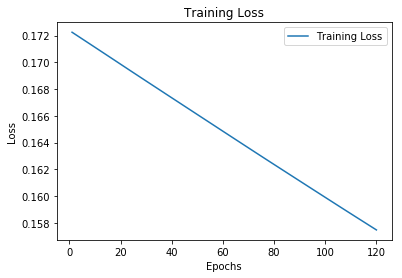

In [168]:
#Graph loss function for training set

history_dict = history.history
history_dict.keys()

loss_list = history_dict['loss']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, loss_list, label = 'Training Loss')

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

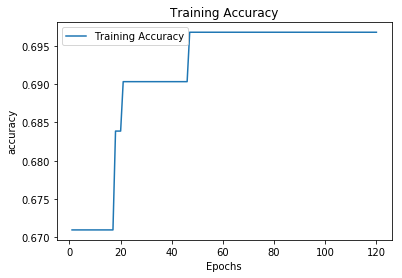

In [169]:
#Graph accuracy function for training set

accuracy_list = history_dict['acc']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, accuracy_list, label = 'Training Accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy with test set increased with neural network

# Tune neural network to see if results will improve

In [177]:
#linear in last layer


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', input_shape = (6,)))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(25, activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 256, epochs = 120)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#improvements in both training and test sets
#keep linear in last layer

Epoch 1/120
155/155 [==============================] - 1s 7ms/step - loss: 0.2552 - acc: 0.1806
Epoch 2/120
155/155 [==============================] - 0s 29us/step - loss: 0.2526 - acc: 0.1871
Epoch 3/120
155/155 [==============================] - 0s 25us/step - loss: 0.2501 - acc: 0.2194
Epoch 4/120
155/155 [==============================] - 0s 21us/step - loss: 0.2476 - acc: 0.2258
Epoch 5/120
155/155 [==============================] - 0s 22us/step - loss: 0.2453 - acc: 0.2516
Epoch 6/120
155/155 [==============================] - 0s 24us/step - loss: 0.2429 - acc: 0.2710
Epoch 7/120
155/155 [==============================] - 0s 23us/step - loss: 0.2406 - acc: 0.2903
Epoch 8/120
155/155 [==============================] - 0s 23us/step - loss: 0.2384 - acc: 0.3290
Epoch 9/120
155/155 [==============================] - 0s 24us/step - loss: 0.2363 - acc: 0.3677
Epoch 10/120
155/155 [==============================] - 0s 23us/step - loss: 0.2341 - acc: 0.3871
Epoch 11/120
155/155 [========

Epoch 85/120
155/155 [==============================] - 0s 22us/step - loss: 0.1503 - acc: 0.6903
Epoch 86/120
155/155 [==============================] - 0s 23us/step - loss: 0.1497 - acc: 0.6903
Epoch 87/120
155/155 [==============================] - 0s 24us/step - loss: 0.1492 - acc: 0.6903
Epoch 88/120
155/155 [==============================] - 0s 27us/step - loss: 0.1486 - acc: 0.6903
Epoch 89/120
155/155 [==============================] - 0s 24us/step - loss: 0.1481 - acc: 0.6903
Epoch 90/120
155/155 [==============================] - 0s 22us/step - loss: 0.1476 - acc: 0.6903
Epoch 91/120
155/155 [==============================] - 0s 23us/step - loss: 0.1471 - acc: 0.6903
Epoch 92/120
155/155 [==============================] - 0s 22us/step - loss: 0.1466 - acc: 0.6903
Epoch 93/120
155/155 [==============================] - 0s 23us/step - loss: 0.1462 - acc: 0.6903
Epoch 94/120
155/155 [==============================] - 0s 23us/step - loss: 0.1457 - acc: 0.6903
Epoch 95/120
155/155

In [186]:
#l1 regularization


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l1(0.005),activation = 'relu'))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l1(0.005),activation = 'relu'))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l1(0.005),activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 256, epochs = 120)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#slightly worse in training accuracy, same in testing accuracy


Epoch 1/120
155/155 [==============================] - 1s 8ms/step - loss: 1.8870 - acc: 0.4774
Epoch 2/120
155/155 [==============================] - 0s 24us/step - loss: 1.8837 - acc: 0.5484
Epoch 3/120
155/155 [==============================] - 0s 26us/step - loss: 1.8804 - acc: 0.6000
Epoch 4/120
155/155 [==============================] - 0s 25us/step - loss: 1.8772 - acc: 0.6452
Epoch 5/120
155/155 [==============================] - 0s 26us/step - loss: 1.8740 - acc: 0.6710
Epoch 6/120
155/155 [==============================] - 0s 25us/step - loss: 1.8709 - acc: 0.6774
Epoch 7/120
155/155 [==============================] - 0s 27us/step - loss: 1.8678 - acc: 0.6839
Epoch 8/120
155/155 [==============================] - 0s 24us/step - loss: 1.8648 - acc: 0.6903
Epoch 9/120
155/155 [==============================] - 0s 23us/step - loss: 1.8619 - acc: 0.6903
Epoch 10/120
155/155 [==============================] - 0s 25us/step - loss: 1.8590 - acc: 0.6903
Epoch 11/120
155/155 [========

Epoch 85/120
155/155 [==============================] - 0s 24us/step - loss: 1.7347 - acc: 0.6968
Epoch 86/120
155/155 [==============================] - 0s 23us/step - loss: 1.7338 - acc: 0.6968
Epoch 87/120
155/155 [==============================] - 0s 23us/step - loss: 1.7329 - acc: 0.6968
Epoch 88/120
155/155 [==============================] - 0s 26us/step - loss: 1.7320 - acc: 0.6968
Epoch 89/120
155/155 [==============================] - 0s 27us/step - loss: 1.7311 - acc: 0.6968
Epoch 90/120
155/155 [==============================] - 0s 31us/step - loss: 1.7303 - acc: 0.6968
Epoch 91/120
155/155 [==============================] - 0s 26us/step - loss: 1.7294 - acc: 0.6968
Epoch 92/120
155/155 [==============================] - 0s 25us/step - loss: 1.7286 - acc: 0.6968
Epoch 93/120
155/155 [==============================] - 0s 23us/step - loss: 1.7277 - acc: 0.6968
Epoch 94/120
155/155 [==============================] - 0s 24us/step - loss: 1.7269 - acc: 0.6968
Epoch 95/120
155/155

In [187]:
#l2 regularization


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dense(25, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 256, epochs = 120)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#slightly worse in training accuracy, same in testing accuracy


Epoch 1/120
155/155 [==============================] - 1s 9ms/step - loss: 0.6163 - acc: 0.6129
Epoch 2/120
155/155 [==============================] - 0s 25us/step - loss: 0.6138 - acc: 0.6258
Epoch 3/120
155/155 [==============================] - 0s 28us/step - loss: 0.6113 - acc: 0.6387
Epoch 4/120
155/155 [==============================] - 0s 26us/step - loss: 0.6089 - acc: 0.6516
Epoch 5/120
155/155 [==============================] - 0s 25us/step - loss: 0.6066 - acc: 0.6645
Epoch 6/120
155/155 [==============================] - 0s 24us/step - loss: 0.6043 - acc: 0.6839
Epoch 7/120
155/155 [==============================] - 0s 23us/step - loss: 0.6020 - acc: 0.6903
Epoch 8/120
155/155 [==============================] - 0s 24us/step - loss: 0.5998 - acc: 0.6903
Epoch 9/120
155/155 [==============================] - 0s 25us/step - loss: 0.5977 - acc: 0.6903
Epoch 10/120
155/155 [==============================] - 0s 25us/step - loss: 0.5956 - acc: 0.6903
Epoch 11/120
155/155 [========

Epoch 85/120
155/155 [==============================] - 0s 25us/step - loss: 0.5055 - acc: 0.6968
Epoch 86/120
155/155 [==============================] - 0s 29us/step - loss: 0.5049 - acc: 0.6968
Epoch 87/120
155/155 [==============================] - 0s 25us/step - loss: 0.5043 - acc: 0.6968
Epoch 88/120
155/155 [==============================] - 0s 25us/step - loss: 0.5037 - acc: 0.6968
Epoch 89/120
155/155 [==============================] - 0s 24us/step - loss: 0.5031 - acc: 0.6968
Epoch 90/120
155/155 [==============================] - 0s 24us/step - loss: 0.5025 - acc: 0.6968
Epoch 91/120
155/155 [==============================] - 0s 24us/step - loss: 0.5020 - acc: 0.6968
Epoch 92/120
155/155 [==============================] - 0s 25us/step - loss: 0.5014 - acc: 0.6968
Epoch 93/120
155/155 [==============================] - 0s 23us/step - loss: 0.5009 - acc: 0.6968
Epoch 94/120
155/155 [==============================] - 0s 25us/step - loss: 0.5003 - acc: 0.6968
Epoch 95/120
155/155

In [189]:
#Dropout, progressive layers, smaller batches, more epochs


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(50, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 100, epochs = 200)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#Didn't make much of a difference

Epoch 1/200
155/155 [==============================] - 2s 13ms/step - loss: 0.4163 - acc: 0.2452
Epoch 2/200
155/155 [==============================] - 0s 207us/step - loss: 0.4133 - acc: 0.4581
Epoch 3/200
155/155 [==============================] - 0s 203us/step - loss: 0.4082 - acc: 0.5548
Epoch 4/200
155/155 [==============================] - 0s 181us/step - loss: 0.4027 - acc: 0.6258
Epoch 5/200
155/155 [==============================] - 0s 175us/step - loss: 0.3984 - acc: 0.6839
Epoch 6/200
155/155 [==============================] - 0s 217us/step - loss: 0.3952 - acc: 0.6774
Epoch 7/200
155/155 [==============================] - 0s 185us/step - loss: 0.3902 - acc: 0.6839
Epoch 8/200
155/155 [==============================] - 0s 193us/step - loss: 0.3864 - acc: 0.6839
Epoch 9/200
155/155 [==============================] - 0s 174us/step - loss: 0.3820 - acc: 0.6968
Epoch 10/200
155/155 [==============================] - 0s 179us/step - loss: 0.3790 - acc: 0.6903
Epoch 11/200
155/155

155/155 [==============================] - 0s 175us/step - loss: 0.2752 - acc: 0.6968
Epoch 166/200
155/155 [==============================] - 0s 177us/step - loss: 0.2752 - acc: 0.6968
Epoch 167/200
155/155 [==============================] - 0s 174us/step - loss: 0.2745 - acc: 0.6968
Epoch 168/200
155/155 [==============================] - 0s 178us/step - loss: 0.2743 - acc: 0.6968
Epoch 169/200
155/155 [==============================] - 0s 178us/step - loss: 0.2750 - acc: 0.6968
Epoch 170/200
155/155 [==============================] - 0s 178us/step - loss: 0.2744 - acc: 0.6968
Epoch 171/200
155/155 [==============================] - 0s 175us/step - loss: 0.2739 - acc: 0.6968
Epoch 172/200
155/155 [==============================] - 0s 177us/step - loss: 0.2739 - acc: 0.6968
Epoch 173/200
155/155 [==============================] - 0s 178us/step - loss: 0.2742 - acc: 0.6968
Epoch 174/200
155/155 [==============================] - 0s 179us/step - loss: 0.2752 - acc: 0.6968
Epoch 175/200


In [207]:
#Greatly larger number of epochs, smaller batch size


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(50, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 10, epochs = 400)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#Training accuracy went up but testing accuracy went down
#Try again with fewer epochs

Epoch 1/400
155/155 [==============================] - 3s 18ms/step - loss: 0.3917 - acc: 0.6581
Epoch 2/400
155/155 [==============================] - 0s 661us/step - loss: 0.3608 - acc: 0.6968
Epoch 3/400
155/155 [==============================] - 0s 942us/step - loss: 0.3365 - acc: 0.6968
Epoch 4/400
155/155 [==============================] - 0s 648us/step - loss: 0.3194 - acc: 0.6968
Epoch 5/400
155/155 [==============================] - 0s 658us/step - loss: 0.3065 - acc: 0.6968
Epoch 6/400
155/155 [==============================] - 0s 657us/step - loss: 0.2976 - acc: 0.6968
Epoch 7/400
155/155 [==============================] - 0s 934us/step - loss: 0.2896 - acc: 0.6968
Epoch 8/400
155/155 [==============================] - 0s 650us/step - loss: 0.2842 - acc: 0.6968
Epoch 9/400
155/155 [==============================] - 0s 648us/step - loss: 0.2827 - acc: 0.6968
Epoch 10/400
155/155 [==============================] - 0s 666us/step - loss: 0.2794 - acc: 0.6968
Epoch 11/400
155/155

Epoch 84/400
155/155 [==============================] - 0s 890us/step - loss: 0.2419 - acc: 0.6968
Epoch 85/400
155/155 [==============================] - 0s 644us/step - loss: 0.2409 - acc: 0.6968
Epoch 86/400
155/155 [==============================] - 0s 671us/step - loss: 0.2405 - acc: 0.6968
Epoch 87/400
155/155 [==============================] - 0s 621us/step - loss: 0.2406 - acc: 0.6968
Epoch 88/400
155/155 [==============================] - 0s 861us/step - loss: 0.2396 - acc: 0.6968
Epoch 89/400
155/155 [==============================] - 0s 630us/step - loss: 0.2390 - acc: 0.6968
Epoch 90/400
155/155 [==============================] - 0s 633us/step - loss: 0.2390 - acc: 0.6968
Epoch 91/400
155/155 [==============================] - 0s 650us/step - loss: 0.2379 - acc: 0.6968
Epoch 92/400
155/155 [==============================] - 0s 952us/step - loss: 0.2373 - acc: 0.6968
Epoch 93/400
155/155 [==============================] - 0s 660us/step - loss: 0.2388 - acc: 0.6968
Epoch 94/4

155/155 [==============================] - 0s 954us/step - loss: 0.1741 - acc: 0.6903
Epoch 249/400
155/155 [==============================] - 0s 706us/step - loss: 0.1756 - acc: 0.7032
Epoch 250/400
155/155 [==============================] - 0s 707us/step - loss: 0.1736 - acc: 0.7032
Epoch 251/400
155/155 [==============================] - 0s 714us/step - loss: 0.1738 - acc: 0.6968
Epoch 252/400
155/155 [==============================] - 0s 962us/step - loss: 0.1718 - acc: 0.6968
Epoch 253/400
155/155 [==============================] - 0s 717us/step - loss: 0.1700 - acc: 0.6968
Epoch 254/400
155/155 [==============================] - 0s 711us/step - loss: 0.1726 - acc: 0.6903
Epoch 255/400
155/155 [==============================] - 0s 704us/step - loss: 0.1724 - acc: 0.6968
Epoch 256/400
155/155 [==============================] - 0s 966us/step - loss: 0.1696 - acc: 0.6968
Epoch 257/400
155/155 [==============================] - 0s 708us/step - loss: 0.1718 - acc: 0.6968
Epoch 258/400


155/155 [==============================] - 0s 946us/step - loss: 0.1530 - acc: 0.7161
Epoch 331/400
155/155 [==============================] - 0s 688us/step - loss: 0.1518 - acc: 0.7226
Epoch 332/400
155/155 [==============================] - 0s 687us/step - loss: 0.1488 - acc: 0.7097
Epoch 333/400
155/155 [==============================] - 0s 699us/step - loss: 0.1517 - acc: 0.7419
Epoch 334/400
155/155 [==============================] - 0s 928us/step - loss: 0.1485 - acc: 0.7290
Epoch 335/400
155/155 [==============================] - 0s 719us/step - loss: 0.1474 - acc: 0.7226
Epoch 336/400
155/155 [==============================] - 0s 696us/step - loss: 0.1464 - acc: 0.7613
Epoch 337/400
155/155 [==============================] - 0s 968us/step - loss: 0.1497 - acc: 0.7226
Epoch 338/400
155/155 [==============================] - 0s 713us/step - loss: 0.1426 - acc: 0.7548
Epoch 339/400
155/155 [==============================] - 0s 706us/step - loss: 0.1475 - acc: 0.7419
Epoch 340/400


In [210]:
#Greatly larger number of epochs, smaller batch size


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(50, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 10, epochs = 300)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#Training accuracy went up but testing accuracy went down
#Try again with fewer epochs

Epoch 1/300
155/155 [==============================] - 3s 18ms/step - loss: 0.3996 - acc: 0.5484
Epoch 2/300
155/155 [==============================] - 0s 672us/step - loss: 0.3716 - acc: 0.6968
Epoch 3/300
155/155 [==============================] - 0s 925us/step - loss: 0.3477 - acc: 0.6968
Epoch 4/300
155/155 [==============================] - 0s 628us/step - loss: 0.3291 - acc: 0.6968
Epoch 5/300
155/155 [==============================] - 0s 645us/step - loss: 0.3151 - acc: 0.6968
Epoch 6/300
155/155 [==============================] - 0s 654us/step - loss: 0.3041 - acc: 0.6968
Epoch 7/300
155/155 [==============================] - 0s 916us/step - loss: 0.2949 - acc: 0.6968
Epoch 8/300
155/155 [==============================] - 0s 652us/step - loss: 0.2904 - acc: 0.6968
Epoch 9/300
155/155 [==============================] - 0s 650us/step - loss: 0.2861 - acc: 0.6968
Epoch 10/300
155/155 [==============================] - 0s 656us/step - loss: 0.2818 - acc: 0.6968
Epoch 11/300
155/155

155/155 [==============================] - 0s 731us/step - loss: 0.2066 - acc: 0.6968
Epoch 166/300
155/155 [==============================] - 0s 729us/step - loss: 0.2072 - acc: 0.6968
Epoch 167/300
155/155 [==============================] - 0s 704us/step - loss: 0.2056 - acc: 0.6968
Epoch 168/300
155/155 [==============================] - 0s 989us/step - loss: 0.2047 - acc: 0.6968
Epoch 169/300
155/155 [==============================] - 0s 716us/step - loss: 0.2039 - acc: 0.6968
Epoch 170/300
155/155 [==============================] - 0s 725us/step - loss: 0.2043 - acc: 0.6968
Epoch 171/300
155/155 [==============================] - 0s 968us/step - loss: 0.2049 - acc: 0.6968
Epoch 172/300
155/155 [==============================] - 0s 734us/step - loss: 0.2044 - acc: 0.6968
Epoch 173/300
155/155 [==============================] - 0s 720us/step - loss: 0.2030 - acc: 0.6968
Epoch 174/300
155/155 [==============================] - 0s 768us/step - loss: 0.2023 - acc: 0.6968
Epoch 175/300


In [227]:
#Greatly larger number of epochs, smaller batch size


model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(50, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(200, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(250, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(4, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 10, epochs = 225)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

#Training accuracy went up but testing accuracy went down
#Try again with fewer epochs

Epoch 1/225
155/155 [==============================] - 4s 23ms/step - loss: 0.3885 - acc: 0.6129
Epoch 2/225
155/155 [==============================] - 0s 791us/step - loss: 0.3582 - acc: 0.6968
Epoch 3/225
155/155 [==============================] - 0s 782us/step - loss: 0.3338 - acc: 0.6968
Epoch 4/225
155/155 [==============================] - 0s 788us/step - loss: 0.3156 - acc: 0.6968
Epoch 5/225
155/155 [==============================] - 0s 1ms/step - loss: 0.3041 - acc: 0.6968
Epoch 6/225
155/155 [==============================] - 0s 784us/step - loss: 0.2945 - acc: 0.6968
Epoch 7/225
155/155 [==============================] - 0s 777us/step - loss: 0.2875 - acc: 0.6968
Epoch 8/225
155/155 [==============================] - 0s 1ms/step - loss: 0.2844 - acc: 0.6968
Epoch 9/225
155/155 [==============================] - 0s 785us/step - loss: 0.2805 - acc: 0.6968
Epoch 10/225
155/155 [==============================] - 0s 791us/step - loss: 0.2778 - acc: 0.6968
Epoch 11/225
155/155 [==

Epoch 167/225
155/155 [==============================] - 0s 898us/step - loss: 0.1998 - acc: 0.6968
Epoch 168/225
155/155 [==============================] - 0s 1ms/step - loss: 0.2012 - acc: 0.6968
Epoch 169/225
155/155 [==============================] - 0s 889us/step - loss: 0.2005 - acc: 0.6968
Epoch 170/225
155/155 [==============================] - 0s 897us/step - loss: 0.2010 - acc: 0.6968
Epoch 171/225
155/155 [==============================] - 0s 1ms/step - loss: 0.2014 - acc: 0.6968
Epoch 172/225
155/155 [==============================] - 0s 885us/step - loss: 0.1994 - acc: 0.6968
Epoch 173/225
155/155 [==============================] - 0s 898us/step - loss: 0.1939 - acc: 0.6968
Epoch 174/225
155/155 [==============================] - 0s 1ms/step - loss: 0.1984 - acc: 0.6968
Epoch 175/225
155/155 [==============================] - 0s 884us/step - loss: 0.1982 - acc: 0.6968
Epoch 176/225
155/155 [==============================] - 0s 924us/step - loss: 0.1976 - acc: 0.6968
Epoch 

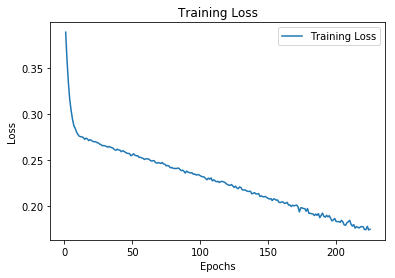

In [228]:
#Plot loss

history_dict = history.history
history_dict.keys()

loss_list = history_dict['loss']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, loss_list, label = 'Training Loss')

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

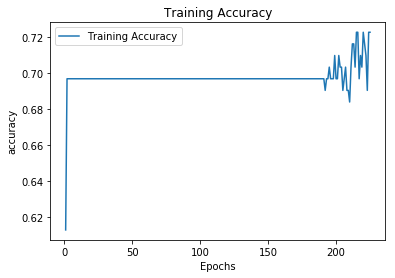

In [229]:
#Plot accuracy

accuracy_list = history_dict['acc']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, accuracy_list, label = 'Training Accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [237]:
model.predict(scaled_features_3)

array([[ 4.21175361e-01,  2.87041157e-01,  1.59928456e-01,
         1.38865203e-01],
       [ 3.86215866e-01,  3.11481535e-01,  1.57116920e-01,
         1.32445037e-01],
       [-2.78395042e-02,  1.00770664e+00,  3.96271013e-02,
        -2.87350640e-03],
       [ 3.87904733e-01,  3.31381142e-01,  1.46952167e-01,
         1.22254878e-01],
       [-2.65444517e-02,  1.00441253e+00,  4.18694355e-02,
        -2.68775597e-03],
       [ 4.07140195e-01,  3.02749455e-01,  1.55129462e-01,
         1.31247327e-01],
       [ 2.26684213e-02,  9.22868073e-01,  5.36954887e-02,
        -5.70251420e-03],
       [ 8.65375102e-02,  8.26621950e-01,  6.96631819e-02,
         8.32524896e-03],
       [-3.74584347e-02,  1.02471828e+00,  3.70412208e-02,
        -2.12218612e-04],
       [ 4.43865567e-01,  2.73696929e-01,  1.68919742e-01,
         1.51896760e-01],
       [ 2.54167616e-03,  9.54104722e-01,  5.06151766e-02,
        -8.09600577e-03],
       [-3.12288329e-02,  1.01965070e+00,  3.51829119e-02,
      

In [233]:
prediction_indices = []

for item in model.predict(scaled_features_3):
    highest_prob = item[0]
    highest_prob_index = 0
    for i in range(1,len(item)):
        if item[i] > highest_prob:
            highest_prob = item[i]
            highest_prob_index = i
    prediction_indices.append(highest_prob_index)
    
pd.Series(prediction_indices).value_counts()

#2 of the options were never predicted
#Try model that does not discriminate amongst specific all-nba team
    

# Model with any all-nba team as a class instead of first, second, and third teams

In [239]:
#Make copy of previous df to edit
df_4 = df_3.copy()

In [241]:
#Recategorize any non "No_Honors" category as "Selected"

new_h = []
for item in df_4['Honors_Next_Year']:
    if item != 'No_Honors':
        new_h.append('Selected')
    else:
        new_h.append('No_Honors')
        
df_4['Honors_Next_Year'] = new_h
df_4

,ORB,DRB,STL,BLK,TSP,a/t_ratio,Honors_Next_Year
303,1.2,7.3,1.4,0.8,0.621176,2.170732,Selected
1193,3.5,8.4,0.7,1.2,0.617315,1.040000,Selected
1226,1.2,2.7,1.0,0.4,0.534810,1.000000,No_Honors
1464,0.7,5.0,1.6,0.6,0.600245,1.651163,Selected
2661,0.6,3.5,1.0,0.3,0.532338,1.761905,No_Honors
...,...,...,...,...,...,...,...
10292,0.6,3.6,1.3,0.3,0.498532,1.230769,No_Honors
10293,1.1,2.4,1.1,0.6,0.521403,1.243243,No_Honors
10319,0.5,2.6,1.2,0.1,0.532454,1.678571,No_Honors
10337,1.6,6.0,1.5,0.5,0.506859,1.468750,No_Honors


In [243]:
#isolate features from target and scale the features

features_4 = df_4.drop(['Honors_Next_Year'], axis = 1)
target_4 = df_4['Honors_Next_Year']

scaler = StandardScaler()
scaled_features_4 = pd.DataFrame(scaler.fit_transform(features_4), columns = features_4.columns)

In [247]:
#Repeat process to make honors category a quantiative array


product_4 = df_4["Honors_Next_Year"]

le = preprocessing.LabelEncoder()
le.fit(product_4)
product_cat_4 = le.transform(product_4)  
product_onehot_4 = to_categorical(product_cat_4)

Original class labels:
['No_Honors', 'Selected']


New product labels:
[1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 1 1 0 0 0 0 0]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.

In [270]:
#Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(scaled_features_4, 
                                                    product_onehot_4, 
                                                    random_state = 123, 
                                                    test_size = .2)





In [271]:
#Run model with best version of model from previous attempts

model = models.Sequential()
model.add(layers.Dense(25, activation = 'relu', kernel_initializer='normal',input_shape = (6,)))
model.add(layers.Dense(50, kernel_regularizer= regularizers.l2(0.005),activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(200, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(250, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(2, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 10, epochs = 60)

y_hat = model.predict(X_test)

results_train = model.evaluate(X_train, y_train)
print(results_train)

results_test = model.evaluate(X_test, y_test)
print(results_test)

Epoch 1/60
155/155 [==============================] - 5s 30ms/step - loss: 5.2086 - acc: 0.5323
Epoch 2/60
155/155 [==============================] - 0s 1ms/step - loss: 6.0940 - acc: 0.5000
Epoch 3/60
155/155 [==============================] - 0s 925us/step - loss: 6.0951 - acc: 0.5000
Epoch 4/60
155/155 [==============================] - 0s 903us/step - loss: 6.0915 - acc: 0.5000
Epoch 5/60
155/155 [==============================] - 0s 1ms/step - loss: 6.0926 - acc: 0.5000
Epoch 6/60
155/155 [==============================] - 0s 921us/step - loss: 6.0903 - acc: 0.5000
Epoch 7/60
155/155 [==============================] - 0s 898us/step - loss: 6.0937 - acc: 0.5000
Epoch 8/60
155/155 [==============================] - 0s 1ms/step - loss: 6.0897 - acc: 0.5000
Epoch 9/60
155/155 [==============================] - 0s 910us/step - loss: 6.0883 - acc: 0.5000
Epoch 10/60
155/155 [==============================] - 0s 908us/step - loss: 6.0852 - acc: 0.5000
Epoch 11/60
155/155 [===============

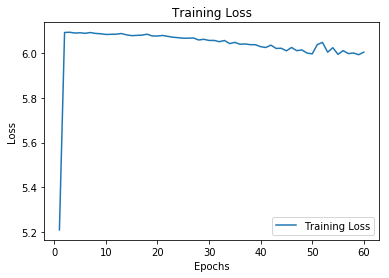

In [272]:
#Plot loss

history_dict = history.history
history_dict.keys()

loss_list = history_dict['loss']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, loss_list, label = 'Training Loss')

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

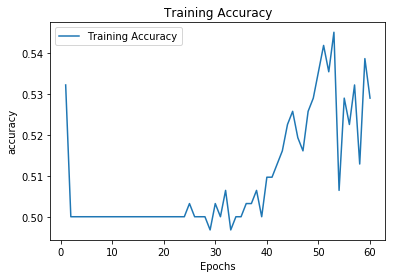

In [273]:
#Plot accuracy

accuracy_list = history_dict['acc']
epochs = range(1,len(loss_list)+1)

plt.plot(epochs, accuracy_list, label = 'Training Accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [372]:
#Confirm that model does not only pick "No_Honors"

df_4['Honors_Next_Year'].value_counts()
print(139/(55+139)) #.71
#The model does not

No_Honors    139
Selected      55
Name: Honors_Next_Year, dtype: int64

# See if machine learning model works better with df_4

In [264]:
#Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(scaled_features_4, target_4, test_size = .2, random_state = 123)

#Conduct Simple Classifications


#Create pipeline for SVM  model
pipe_svm = Pipeline([('clf', svm.SVC(random_state=123))])

#Create pipeline for Decision Tree model      
pipe_tree = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=123))])

#Create pipeline for Random Forest Model analysis
pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

#Loop through the pipelines to fit each pipeline to the dataset
pipes = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
for pipe in pipes:
    pipe.fit(X_train, y_train)

# Compare model accuracies with default parameters
for index, val in enumerate(pipes):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))
    


Support Vector Machine pipeline test accuracy: 0.8461538461538461
Decision Tree pipeline test accuracy: 0.8205128205128205
Random Forest pipeline test accuracy: 0.8205128205128205


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [265]:
#Grid search to find best parameters


#SVM


#Create SVM pipeline
pipe_svm = Pipeline([('clf', svm.SVC(random_state = 123))])

# Set grid search parameters for SVM
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search using the SVM pipeline and grid search parameters
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit SVM model using grid search
gs_svm.fit(X_train, y_train)



#Random Forest

#Create Random Forest pipeline
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search parameters for Random Forest
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Random Forest model using grid search
gs_rf.fit(X_train, y_train)



#Adaboost


from sklearn.ensemble import AdaBoostClassifier
# Construct Adaboost pipeline
pipe_ab = Pipeline([
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params for Adaboost
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit Adaboost model using grid search
gs_ab.fit(X_train, y_train)



#Print out the best accuracy scores and parameters for each model

# Best accuracy SVM
print('Best accuracy for SVM {}'.format(gs_svm.best_score_))
# Best params SVM
print('Best params for SVM {}'.format(gs_svm.best_params_))

print()

# Best accuracy Random Forest
print('Best accuracy for Random Forest {}'.format(gs_rf.best_score_))
# Best params Random Forest
print('Best params for Random Forest {}'.format(gs_rf.best_params_))

print()

# Best accuracy Adaboost
print('Best accuracy for Adaboost {}'.format(gs_ab.best_score_))
# Best params Adaboost
print('Best params for Adaboost {}'.format(gs_ab.best_params_))

#Highest accuracy - Random forest with:
#{'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.05, 
#'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}

#create SVM pipeline with best parameters
pipe_rf_best = Pipeline([
            ('clf', RandomForestClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = .05,
             min_samples_split = .05, n_estimators = 50,random_state = 123))])

#Fit model to the dataaset
pipe_rf_best.fit(X_train, y_train)

#Make predictions
preds = pipe_rf_best.predict(X_test)



Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total=   0.0s
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_s

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_l

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, cl

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   16.8s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   0.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   0.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__l

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.1s finished
/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [266]:
print()

#Test model accuracy
print("Accuracy with best model: {}".format(accuracy_score(y_test, preds)))


Accuracy with best model: 0.7948717948717948


In [275]:
pd.Series(preds).value_counts()

No_Honors    31
Selected      8
dtype: int64

## Best Machine learning model performs about as well as best-tuned neural network - both about 79.5% accurate

In [276]:
prediction_indices = []

for item in model.predict(scaled_features_4):
    highest_prob = item[0]
    highest_prob_index = 0
    for i in range(1,len(item)):
        if item[i] > highest_prob:
            highest_prob = item[i]
            highest_prob_index = i
    prediction_indices.append(highest_prob_index)
    
pd.Series(prediction_indices).value_counts()

#Machine learning model guessed everything as not selected
    

1    194
dtype: int64

## Proceed with Best Machine Learning model

# Compare ML predictions to real labels

## Find entries for which the model erred

In [374]:
#Use ML model to predict all entries in the dataframe
ml_preds = pipe_rf_best.predict(scaled_features_4)
df_4['Predictions'] = ml_preds

#create a df for the entries that have honors and predictions that don't match
dont_match_preds = df_4[df_4['Honors_Next_Year'] != df_4['Predictions']]['Predictions']
dont_match = df_2.iloc[list(df_4[df_4['Honors_Next_Year'] != df_4['Predictions']].index)]
dont_match['Predictions'] = dont_match_preds
dont_match.head()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ORB,DRB,STL,BLK,TSP,a/t_ratio,Year,Player,concat,Pos,Age,Tm,MP,Honors_Next_Year,Predictions
2673,0.7,6.2,1.2,0.7,0.633689,1.545455,2014,Kevin Durant,2014Kevin Durant,SF,25,OKC,3122,No_Honors,Selected
3415,0.5,2.4,0.8,0.2,0.549926,2.142857,2013,Damian Lillard,2013Damian Lillard,PG,22,POR,3167,Third,No_Honors
4453,3.2,6.7,0.6,1.5,0.588652,1.882353,2011,Pau Gasol,2011Pau Gasol,C,30,LAL,3037,No_Honors,Selected
4713,1.0,3.0,1.0,0.6,0.550128,2.242424,2011,Derrick Rose,2011Derrick Rose,PG,22,CHI,3026,First,No_Honors
5180,2.7,8.6,1.0,0.5,0.586265,1.521739,2010,David Lee,2010David Lee,C,26,NYK,3019,No_Honors,Selected


## Find entries for which the model correctly predicted to make jump to all-NBA

In [378]:
#Isolate true positives
df_final = df_2.iloc[df_4.index]
df_final['Predictions'] = df_4['Predictions']
import re

selected_correctly = df_final[(df_final['Predictions'] == 'Selected') & (df_final['Honors_Next_Year'] != 'No_Honors')]
selected_correctly

honor_this_year = []

for i in range(len(selected_correctly)):
    previous_yr = selected_correctly.iloc[i]['Year']
    plyr = selected_correctly.iloc[i]['Player']
    row = df[(df['Player'] == plyr) & (df['Year'] == previous_yr)]
    honor_this_year.append(row['Honors'])


honor_this_year_edited = []

for item in honor_this_year:
    honor_this_year_edited.append(re.split(' ', str(item))[4][:-6])
       


In [379]:
#Check to see if model slected any players who weren't repeating as all-nba selections
#Potentially diamonds in the rough

selected_correctly['Honor_this_year'] = honor_this_year_edited
selected_correctly[selected_correctly['Honor_this_year'] == 'No_Honors']

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ORB,DRB,STL,BLK,TSP,a/t_ratio,Year,Player,concat,Pos,Age,Tm,MP,Honors_Next_Year,Predictions,Honor_this_year
1193,3.5,8.4,0.7,1.2,0.617315,1.040000,2017,Karl-Anthony Towns,2017Karl-Anthony Towns,C,21,MIN,3030,Third,Selected,No_Honors
1464,0.7,5.0,1.6,0.6,0.600245,1.651163,2016,James Harden,2016James Harden,SG,26,HOU,3125,First,Selected,No_Honors
4481,3.1,8.3,0.7,0.5,0.548404,1.384615,2011,Blake Griffin,2011Blake Griffin,PF,21,LAC,3112,Second,Selected,No_Honors
7350,3.4,8.7,0.8,1.4,0.565179,0.576923,2006,Dwight Howard,2006Dwight Howard,PF,20,ORL,3021,Third,Selected,No_Honors
10233,1.1,4.9,1.6,0.8,0.562618,0.966667,2001,Paul Pierce,2001Paul Pierce,SF,23,BOS,3120,Third,Selected,No_Honors


In [ ]:
#The above players were correctly predicted to be all-nba players based on their stats
#the previous year - by continuing to build on the model, this analysis could be a useful
#tool to identify players poised for breakout years

## Find entries for which the model incorrectly predicted to make jump to all-NBA

In [368]:
#Isolate false positives positives
selected_incorrectly = dont_match[dont_match['Predictions'] == 'Selected']

honor_this_year = []

for i in range(len(selected_incorrectly)):
    previous_yr = selected_incorrectly.iloc[i]['Year']
    print(previous_yr)
    plyr = selected_correctly.iloc[i]['Player']
    print(plyr)
    row = df[(df['Player'] == plyr) & (df['Year'] == previous_yr)]
    print(row)
    print()
    honor_this_year.append(row['Honors'])





2014
LeBron James
      Year        Player            concat  count Pos  Age   Tm   G  GS    MP  \
3445  2014  LeBron James  2014LeBron James      1  PF   29  MIA  77  77  2902   

      ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Honors  
3445  ...  1.0  5.6  6.6  6.1  1.5  0.3  3.3  1.6  25.9   First  

[1 rows x 32 columns]

2011
Karl-Anthony Towns
Empty DataFrame
Columns: [Year, Player, concat, count, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Honors]
Index: []

[0 rows x 32 columns]

2010
James Harden
      Year        Player            concat  count Pos  Age   Tm   G  GS    MP  \
5721  2010  James Harden  2010James Harden      1  SG   20  OKC  76   0  1738   

      ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS     Honors  
5721  ...  1.0  4.1  5.1  2.8  1.7  0.4  2.2  4.1  15.6  No_Honors  

[1 rows x 32 columns]

2010
Kevin Durant
      Year        Player            concat  count Pos  A

In [369]:
#No one incorrectly selected who is way off base

In [ ]:
#In this case, the evidence of true positives and no glaring false 
#positives is more important
#than false negatives - it is more important to find diamonds in the rough than 
#to scrutinize over every option you might have missed